In [1]:
import numpy as np
import pandas as pd

# Visualisation Libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
import re
from sklearn.preprocessing import RobustScaler

In [3]:
df = pd.read_csv("F:/1.0 T H A P A R/SUBJECTS/sem2/2.0 ML/LMS (SUBJECT + LAB)/2.0 ML LAB/Project/FinalDataset.csv")


print('Loading dataset from csv file and printing the head...\n')
df.head()

Loading dataset from csv file and printing the head...



,State_Name,District_Name,Crop_Year,Season,Crop,Temperature,Humidity,Soil_Moisture,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,36,35,45,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,37,40,46,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,36,41,50,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,37,42,55,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,36,40,54,720.0,165.0


In [5]:
#CREATING A MINI DATASET FOR RICE ONLY AS WE WILL PREDICT RICE PRODUCTION

df_rice = df[df['Crop'] == 'Rice']
df_rice

,State_Name,District_Name,Crop_Year,Season,Crop,Temperature,Humidity,Soil_Moisture,Area,Production
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,36,41,50,102.00,321.00
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,37,42,55,83.00,300.00
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,36,35,45,189.20,510.84
27,Andaman and Nicobar Islands,NICOBARS,2003,Kharif,Rice,36,35,45,52.00,90.17
36,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,Rice,36,35,45,52.94,72.57
...,...,...,...,...,...,...,...,...,...,...
49629,Chhattisgarh,JANJGIR-CHAMPA,2002,Kharif,Rice,25,55,55,252737.00,299041.00
49666,Chhattisgarh,JANJGIR-CHAMPA,2003,Kharif,Rice,36,35,45,253178.00,341989.00
49704,Chhattisgarh,JANJGIR-CHAMPA,2004,Kharif,Rice,36,41,50,253093.00,314469.00
49740,Chhattisgarh,JANJGIR-CHAMPA,2005,Kharif,Rice,34,55,62,253737.00,452873.00


In [466]:
# Adding a new column Yield which indicates Production per unit Area. 

df_rice['Yield'] = (df_rice['Production'] / df_rice['Area'])
df_rice.head(10) 



C:\Users\DELL\AppData\Local\Temp\ipykernel_13476\2100399697.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rice['Yield'] = (df_rice['Production'] / df_rice['Area'])


,State_Name,District_Name,Crop_Year,Season,Crop,Temperature,Humidity,Soil_Moisture,Area,Production,Yield
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,36,41,50,102.00,321.00,3.147059
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,37,42,55,83.00,300.00,3.614458
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,36,35,45,189.20,510.84,2.700000
27,Andaman and Nicobar Islands,NICOBARS,2003,Kharif,Rice,36,35,45,52.00,90.17,1.734038
36,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,Rice,36,35,45,52.94,72.57,1.370797
45,Andaman and Nicobar Islands,NICOBARS,2005,Kharif,Rice,36,35,45,2.09,12.06,5.770335
62,Andaman and Nicobar Islands,NICOBARS,2010,Autumn,Rice,37,40,46,3.50,10.00,2.857143
79,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2000,Kharif,Rice,36,35,45,10779.00,31863.00,2.956026
90,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2001,Kharif,Rice,36,41,50,9718.00,27033.00,2.781745
96,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2006,Kharif,Rice,25,55,55,6854.30,18995.62,2.771344


In [468]:

df_rice

,State_Name,District_Name,Crop_Year,Season,Crop,Temperature,Humidity,Soil_Moisture,Area,Production,Yield
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,36,41,50,102.00,321.00,3.147059
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,37,42,55,83.00,300.00,3.614458
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,36,35,45,189.20,510.84,2.700000
27,Andaman and Nicobar Islands,NICOBARS,2003,Kharif,Rice,36,35,45,52.00,90.17,1.734038
36,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,Rice,36,35,45,52.94,72.57,1.370797
...,...,...,...,...,...,...,...,...,...,...,...
49629,Chhattisgarh,JANJGIR-CHAMPA,2002,Kharif,Rice,25,55,55,252737.00,299041.00,1.183210
49666,Chhattisgarh,JANJGIR-CHAMPA,2003,Kharif,Rice,36,35,45,253178.00,341989.00,1.350785
49704,Chhattisgarh,JANJGIR-CHAMPA,2004,Kharif,Rice,36,41,50,253093.00,314469.00,1.242504
49740,Chhattisgarh,JANJGIR-CHAMPA,2005,Kharif,Rice,34,55,62,253737.00,452873.00,1.784813


In [470]:
X = df_rice.drop(["Yield","Crop"],axis=1)

y = df_rice["Yield"]

In [472]:
X

,State_Name,District_Name,Crop_Year,Season,Temperature,Humidity,Soil_Moisture,Area,Production
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,36,41,50,102.00,321.00
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,37,42,55,83.00,300.00
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,36,35,45,189.20,510.84
27,Andaman and Nicobar Islands,NICOBARS,2003,Kharif,36,35,45,52.00,90.17
36,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,36,35,45,52.94,72.57
...,...,...,...,...,...,...,...,...,...
49629,Chhattisgarh,JANJGIR-CHAMPA,2002,Kharif,25,55,55,252737.00,299041.00
49666,Chhattisgarh,JANJGIR-CHAMPA,2003,Kharif,36,35,45,253178.00,341989.00
49704,Chhattisgarh,JANJGIR-CHAMPA,2004,Kharif,36,41,50,253093.00,314469.00
49740,Chhattisgarh,JANJGIR-CHAMPA,2005,Kharif,34,55,62,253737.00,452873.00


In [474]:
y

2        3.147059
12       3.614458
18       2.700000
27       1.734038
36       1.370797
           ...   
49629    1.183210
49666    1.350785
49704    1.242504
49740    1.784813
49777    1.895531
Name: Yield, Length: 3851, dtype: float64

In [476]:
# train test split 


from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler


# riceDF = FINAL_RICE_DATAFRAME_AFTER_CHECKING_ALL_CORRELATIONS
# Feature Engineering: Creating new features

# riceDF["Production_per_Area"] = riceDF["Production"] / (riceDF["Area"] + 1)  # Avoid division by zero

# riceDF["Humidity_Soil_Interaction"] = riceDF["Humidity"] * riceDF["Soil_Moisture"]


# Selecting important features
# selected_features = ["Crop_Year","Area","Production","Production_per_Area", "Humidity_Soil_Interaction"]

# X = riceDF[selected_features]

# y = riceDF["Yield"]


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [478]:
X_train

,State_Name,District_Name,Crop_Year,Season,Temperature,Humidity,Soil_Moisture,Area,Production
13862,Assam,CACHAR,1998,Autumn,37,40,46,8500.0,11894.0
12622,Assam,BAKSA,2014,Autumn,37,42,55,10800.0,18283.0
39843,Bihar,PURBI CHAMPARAN,2001,Autumn,25,55,55,118353.0,143365.0
11904,Arunachal Pradesh,UPPER SUBANSIRI,2007,Kharif,36,40,54,5100.0,11079.0
15126,Assam,DARRANG,2009,Autumn,34,45,52,14624.0,10676.0
...,...,...,...,...,...,...,...,...,...
16228,Assam,DHUBRI,2006,Winter,37,40,46,33278.0,30927.0
17967,Assam,GOALPARA,2008,Summer,37,42,55,19500.0,53742.0
13302,Assam,BONGAIGAON,1998,Winter,25,55,55,56133.0,54267.0
43417,Bihar,SHEOHAR,2005,Winter,36,41,50,17951.0,11660.0


In [480]:
X_test

,State_Name,District_Name,Crop_Year,Season,Temperature,Humidity,Soil_Moisture,Area,Production
34885,Bihar,KISHANGANJ,1999,Summer,25,55,55,10291.0,17542.0
9123,Andhra Pradesh,VIZIANAGARAM,2013,Rabi,34,45,52,7507.0,20479.0
5818,Andhra Pradesh,PRAKASAM,2004,Rabi,37,40,46,66134.0,220491.0
44701,Bihar,SUPAUL,1997,Summer,37,40,46,8657.0,13823.0
38559,Bihar,NAWADA,2009,Winter,36,41,50,51211.0,61319.0
...,...,...,...,...,...,...,...,...,...
4299,Andhra Pradesh,KRISHNA,2004,Rabi,37,42,55,10017.0,31584.0
35223,Bihar,KISHANGANJ,2009,Winter,36,40,54,63223.0,35636.0
23722,Assam,NAGAON,1998,Summer,37,40,46,41679.0,100330.0
20983,Assam,KARBI ANGLONG,2003,Autumn,35,50,59,10451.0,12052.0


In [482]:
y_train

13862    1.399294
12622    1.692870
39843    1.211334
11904    2.172353
15126    0.730033
           ...   
16228    0.929353
17967    2.756000
13302    0.966758
43417    0.649546
39817    1.067267
Name: Yield, Length: 3080, dtype: float64

In [484]:
y_test

34885    1.704596
9123     2.727987
5818     3.334004
44701    1.596743
38559    1.197379
           ...   
4299     3.153040
35223    0.563656
23722    2.407207
20983    1.153191
44496    1.244859
Name: Yield, Length: 771, dtype: float64

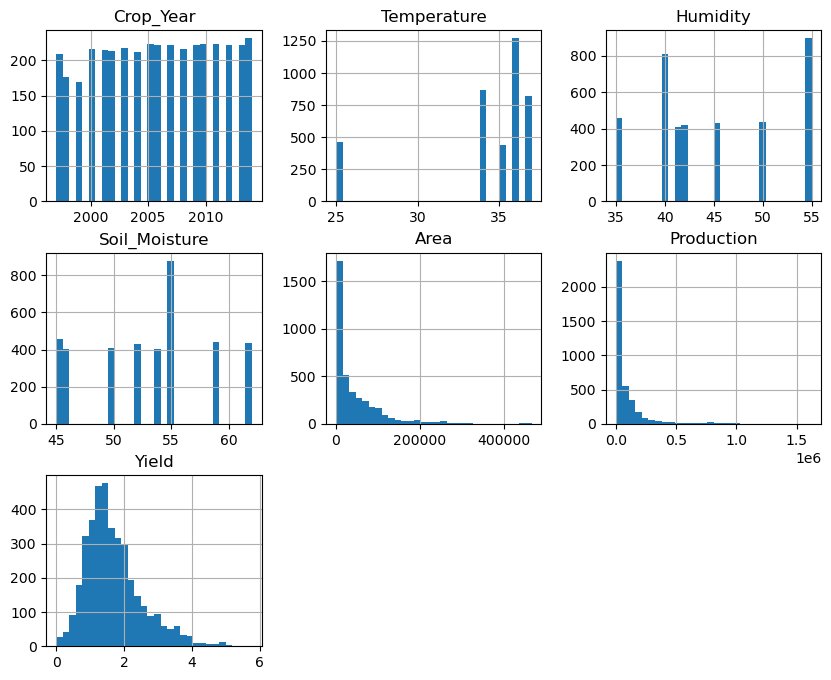

TypeError: could not convert string to float: 'Andaman and Nicobar Islands'

In [486]:
# Load the dataset 
df_rice.hist(figsize=(10, 8), bins=30)  # Visualize distribution
plt.show()

# Check skewness
print(df_rice.skew()) 


In [496]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier



In [490]:
X_train

,State_Name,District_Name,Crop_Year,Season,Temperature,Humidity,Soil_Moisture,Area,Production
13862,Assam,CACHAR,1998,Autumn,37,40,46,8500.0,11894.0
12622,Assam,BAKSA,2014,Autumn,37,42,55,10800.0,18283.0
39843,Bihar,PURBI CHAMPARAN,2001,Autumn,25,55,55,118353.0,143365.0
11904,Arunachal Pradesh,UPPER SUBANSIRI,2007,Kharif,36,40,54,5100.0,11079.0
15126,Assam,DARRANG,2009,Autumn,34,45,52,14624.0,10676.0
...,...,...,...,...,...,...,...,...,...
16228,Assam,DHUBRI,2006,Winter,37,40,46,33278.0,30927.0
17967,Assam,GOALPARA,2008,Summer,37,42,55,19500.0,53742.0
13302,Assam,BONGAIGAON,1998,Winter,25,55,55,56133.0,54267.0
43417,Bihar,SHEOHAR,2005,Winter,36,41,50,17951.0,11660.0


In [566]:


# ohe = OneHotEncoder() #drop='first',handle_unknown="ignore"
# scaler = StandardScaler()


# preprocessor = ColumnTransformer(
#     transformers=[
#         ("onehotencoder",ohe,[0,1,3]),
#         ("standardization",scaler,[2,4,5,6,7,8])
#     ],
#     remainder="passthrough"
# )


# ('OHE_STATE_DISTRICT_SEASON',OneHotEncoder(sparse_output=False,drop='first',handle_unknown="ignore"),['State_Name','District_Name','Season']),
scaler = RobustScaler()

preprocessor = ColumnTransformer([
        ('OHE_STATE_DISTRICT_SEASON',OneHotEncoder(drop='first',handle_unknown="ignore"),['State_Name','District_Name','Season']),     
        ('standardization',scaler,['Crop_Year','Temperature','Humidity','Soil_Moisture','Area','Production'])
    ],
    remainder="passthrough"
)

In [568]:
X_train.head(2)

,State_Name,District_Name,Crop_Year,Season,Temperature,Humidity,Soil_Moisture,Area,Production
13862,Assam,CACHAR,1998,Autumn,37,40,46,8500.0,11894.0
12622,Assam,BAKSA,2014,Autumn,37,42,55,10800.0,18283.0


# CREATING PIPELINE 

(MISSING VALUE)-->ONE HOT ENCODER ---> SCALING---> FEATURE SELECTION ---> DECISION TREE PREDICTON

In [558]:
# # ONE HOT ENCODING STAGE

# # drop='first nai likha because here i'm using decision tree else likhte

# transformer_1 = ColumnTransformer([
#         ('OHE_STATE_DISTRICT_SEASON',OneHotEncoder(sparse_output=False,handle_unknown='ignore'),[0,1,3]),     
# ],remainder="passthrough")

In [411]:
# # # print("Total number of States present in dataset are :", df_rice["State"].count())

# # # Count unique crop types
# # unique_states = df_rice["State_Name"].nunique()
# # print("===============================================\n")
# # print("1) Total unique States :", unique_states)

# # # Show count of each crop
# # state_counts = df_rice["State_Name"].value_counts()
# # print("\nState-wise count: \n", state_counts)



# # unique_districts = df_rice["District_Name"].nunique()
# # print("===============================================\n")
# # print("2) Total unique Districts :", unique_states)

# # # Show count of each crop
# # district_counts = df_rice["District_Name"].value_counts()
# # print("\nDistrict-wise count: \n", district_counts)



# # unique_seasons = df_rice["Season"].nunique()
# # print("===============================================\n")
# # print("3) Total unique Seasons :", unique_seasons)

# # # Show count of each crop
# # season_counts = df_rice["Season"].value_counts()
# # print("\nSeason-wise count: \n", season_counts)







# print("Unique State Name in X_train:", X_train["State_Name"].nunique())
# print("Unique State Name in X_test:", X_test["Season"].nunique())
# print("\nUnique District Name in X_train:", X_train["District_Name"].nunique())
# print("Unique District Name in X_test:", X_test["District_Name"].nunique())
# district_counts = df_rice["District_Name"]
# print("\nDistrict-wise count: \n", district_counts)
# print("\nUnique seasons in X_train:", X_train["Season"].nunique())
# print("Unique seasons in X_test:", X_test["Season"].nunique())







# # unique_temperatures = df_rice["Temperature"].nunique()
# # print("===============================================\n")
# # print("4) Total unique Temparatures :", unique_temperatures)

# # # Show count of each crop
# # temperature_counts = df_rice["Temperature"].value_counts()
# # print("\nTemparature-wise count: \n", temperature_counts)


In [450]:
# # SCALING STAGE
# from sklearn.preprocessing import RobustScaler

# # scaler = RobustScaler()
# # scaled_data = scaler.fit_transform(df)

# transformer_2 = ColumnTransformer([
#         ('SCALING',RobustScaler(),slice(0,130))  
# ],remainder="passthrough")

In [452]:
#FEATURE SELECTION


transformer_3 = SelectKBest(score_func=chi2,k=120)  #top 120 colms lo bas out of 130

In [454]:
#TRAIN THE MODEL

transformer_4 = DecisionTreeRegressor() #DecisionTreeClassifier use kiya h campus X ne

# CREATE PIPELINE

In [560]:
# from sklearn import set_config
# set_config(display='diagram')


# pipe = Pipeline([
#     ('transformer_1',transformer_1),
#     ('transformer_2',transformer_2),
#     ('transformer_3',transformer_3),
#     ('transformer_4',transformer_4)
    
# ])

In [562]:
# pipe.fit(X_train,y_train)

In [570]:
 preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('OHE_STATE_DISTRICT_SEASON',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['State_Name', 'District_Name', 'Season']),
                                ('standardization', RobustScaler(),
                                 ['Crop_Year', 'Temperature', 'Humidity',
                                  'Soil_Moisture', 'Area', 'Production'])])

In [574]:
X_train_dummy = preprocessor.fit_transform(X_train)

X_train_dummy.shape



(3080, 127)

In [576]:
X_train_dummy

<3080x127 sparse matrix of type '<class 'numpy.float64'>'
	with 25096 stored elements in Compressed Sparse Row format>

In [578]:
X_test_dummy = preprocessor.transform(X_test)   #Y TRAIN NI AAEGA ??---> NO !!! YE HMESHA X_TEST HI RHEGA

X_test_dummy.shape


(771, 127)

In [580]:
X_test_dummy

<771x127 sparse matrix of type '<class 'numpy.float64'>'
	with 6256 stored elements in Compressed Sparse Row format>

In [582]:
X_test_dummy

<771x127 sparse matrix of type '<class 'numpy.float64'>'
	with 6256 stored elements in Compressed Sparse Row format>

In [514]:
print(X_test_dummy)

[[ 0.          0.          0.         ...  0.2        -0.16329323
  -0.08915648]
 [ 1.          0.          0.         ... -0.4        -0.21032006
  -0.05932423]
 [ 1.          0.          0.         ... -1.6         0.77999671
   1.97227541]
 ...
 [ 0.          0.          1.         ... -1.6         0.36690723
   0.75175342]
 [ 0.          0.          1.         ...  1.         -0.16059054
  -0.14492054]
 [ 0.          0.          0.         ...  0.2         0.11880017
   0.07395087]]


In [516]:
print("Unique seasons in X_train:", X_train["Season"].unique())
print("Unique seasons in X_test:", X_test["Season"].unique())


Unique seasons in X_train: ['Autumn     ' 'Kharif     ' 'Winter     ' 'Summer     ' 'Rabi       '
 'Whole Year ']
Unique seasons in X_test: ['Summer     ' 'Rabi       ' 'Winter     ' 'Kharif     ' 'Autumn     '
 'Whole Year ']


In [584]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures


from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score,root_mean_squared_error



In [520]:
# models = {
#     "Linear Regression": LinearRegression(),
#     "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
#     "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
# }

models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "SVR": SVR(),
    "KNN Regressor": KNeighborsRegressor(),
    # "Polynomial Regression": LinearRegression()
}


# # Training and evaluation
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     r2 = r2_score(y_test, y_pred)
#     mae = mean_absolute_error(y_test, y_pred)
#     rmse = np.sqrt(mean_squared_error(y_test, y_pred))

#     print(f"\n{name} :-  \n(1) R²: {r2:.4f}\n(2) MAE: {mae:.4f}\n(3) RMSE: {rmse:.4f}")

# Polynomial Features for Polynomial Regression
# poly = PolynomialFeatures(degree=2)
# X_train_poly = poly.fit_transform(X_train)
# X_test_poly = poly.transform(X_test)

results = {}
for name, model in models.items():
    # if name == "Polynomial Regression":
    #     model.fit(X_train_poly, y_train)
    #     y_pred = model.predict(X_test_poly)
    # else:
    model.fit(X_train_dummy, y_train)
    y_pred = model.predict(X_test_dummy)
   
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = {"R²": r2, "MAE": mae,"MSE" : mse, "RMSE": rmse}

# Display results
for model, metrics in results.items():
    print(f"\n\n{model}: \n\nR²={metrics['R²']:.4f},\nMAE={metrics['MAE']:.4f}, \nMSE={metrics['MSE']:.4f}, \nRMSE={metrics['RMSE']:.4f}")


dictDataFrame = pd.DataFrame.from_dict(results)
print(dictDataFrame)




Linear Regression: 

R²=0.7466,
MAE=0.3305, 
MSE=0.1863, 
RMSE=0.4317


Lasso Regression: 

R²=-0.0004,
MAE=0.6710, 
MSE=0.7358, 
RMSE=0.8578


Ridge Regression: 

R²=0.7475,
MAE=0.3311, 
MSE=0.1858, 
RMSE=0.4310


Decision Tree: 

R²=0.8913,
MAE=0.1723, 
MSE=0.0799, 
RMSE=0.2828


Random Forest: 

R²=0.9364,
MAE=0.1284, 
MSE=0.0468, 
RMSE=0.2163


XGBoost: 

R²=0.9618,
MAE=0.1069, 
MSE=0.0281, 
RMSE=0.1677


SVR: 

R²=0.8571,
MAE=0.2135, 
MSE=0.1051, 
RMSE=0.3242


KNN Regressor: 

R²=0.7224,
MAE=0.3369, 
MSE=0.2042, 
RMSE=0.4519
      Linear Regression  Lasso Regression  Ridge Regression  Decision Tree  \
R²             0.746645         -0.000360          0.747458       0.891303   
MAE            0.330453          0.670982          0.331105       0.172270   
MSE            0.186348          0.735787          0.185750       0.079949   
RMSE           0.431681          0.857780          0.430988       0.282752   

      Random Forest   XGBoost       SVR  KNN Regressor  
R²         0.

# AS WE FOUND 4 ALGORITHMS ARE PERFORMING GOOD 

1) DECISION TREE
2) RANDOM FOREST
3) XG BOOST
4) SVR


and among these,

=========
| FIRST |
=========
XGBOOST has the highest r2 score as well as lowest MSE



=========
| SECOND |
=========
Random Forset

=========
| THIRD |
=========
Decision Tree


=========
| FOURTH |
=========    
SVR

# XGBOOST

In [586]:
xg = XGBRegressor()

xg.fit(X_train_dummy,y_train)
xg.predict(X_test_dummy)

# xg :-------> is my trained MODEL NOW !!!!!!!!!!!

array([ 1.6989958e+00,  2.7643161e+00,  3.1960244e+00,  1.6620204e+00,
        1.1682817e+00,  2.3162243e+00,  1.6046381e+00,  1.8257952e+00,
        1.8650823e+00,  1.0564090e+00,  2.0071096e+00,  1.0153420e+00,
        1.9694474e+00,  1.6104171e+00,  2.0220795e+00,  1.2164705e+00,
        1.3113499e+00,  1.7733833e+00,  1.4120493e+00,  6.8475676e-01,
        1.8277326e+00,  4.6199837e+00,  2.4135337e+00,  1.6985749e+00,
        1.6578242e+00,  1.5194330e+00,  2.7927551e+00,  2.3883322e-01,
        2.5300395e+00,  1.1770784e+00,  7.8913313e-01,  3.0026810e+00,
        2.2483716e+00,  1.3544704e+00,  4.0890851e+00,  1.1591418e+00,
        1.7686394e+00,  1.1301408e+00,  1.2107823e+00,  1.5655634e+00,
        1.8711118e+00,  8.8618541e-01,  4.7022504e-01,  1.9540855e+00,
        2.8888361e+00,  1.4847015e+00,  1.3417434e+00,  1.9348714e+00,
        9.0364224e-01,  1.5129039e+00,  1.3187609e+00,  1.5404451e+00,
        1.2827548e+00,  1.7891384e+00,  1.6816294e+00,  1.2215998e+00,
      

# XG BOOST PREDICTIONS 

In [653]:
# def prediction(State_Name,District_Name,Crop_Year,Season,Temperature,Humidity,Soil_Moisture,Area,Production):
#     features = np.array([[State_Name,District_Name,Crop_Year,Season,Temperature,Humidity,Soil_Moisture,Area,Production]])

#     transformed_features = preprocessor.transform(features)

#     predicted_value = xg.predict(transformed_features).reshape(1,-1)

#     return predicted_value[0]


def xgBoostPrediction(State_Name, District_Name, Crop_Year, Season, Temperature, Humidity, Soil_Moisture, Area, Production):
    
    # Convert input into a DataFrame with the same column names as X_train
    feature_names = ["State_Name", "District_Name", "Crop_Year", "Season", "Temperature", "Humidity", "Soil_Moisture", "Area", "Production"]
    
    
    features = pd.DataFrame([[State_Name, District_Name, Crop_Year, Season, Temperature, Humidity, Soil_Moisture, Area, Production]],
                            columns=feature_names)

    # Apply the preprocessor transformation
    transformed_features = preprocessor.transform(features)


    
    # Predict the value using the trained model
    predicted_value = xg.predict(transformed_features).reshape(1, -1)   #models["Random Forest"] or xg

    # Inverse transform the predicted value to original scale
    # predicted_value = y_scaler.inverse_transform(predicted_value).ravel()

    return predicted_value[0]


In [594]:
X_train

,State_Name,District_Name,Crop_Year,Season,Temperature,Humidity,Soil_Moisture,Area,Production
13862,Assam,CACHAR,1998,Autumn,37,40,46,8500.0,11894.0
12622,Assam,BAKSA,2014,Autumn,37,42,55,10800.0,18283.0
39843,Bihar,PURBI CHAMPARAN,2001,Autumn,25,55,55,118353.0,143365.0
11904,Arunachal Pradesh,UPPER SUBANSIRI,2007,Kharif,36,40,54,5100.0,11079.0
15126,Assam,DARRANG,2009,Autumn,34,45,52,14624.0,10676.0
...,...,...,...,...,...,...,...,...,...
16228,Assam,DHUBRI,2006,Winter,37,40,46,33278.0,30927.0
17967,Assam,GOALPARA,2008,Summer,37,42,55,19500.0,53742.0
13302,Assam,BONGAIGAON,1998,Winter,25,55,55,56133.0,54267.0
43417,Bihar,SHEOHAR,2005,Winter,36,41,50,17951.0,11660.0


In [659]:
# order 
# State_Name	District_Name	Crop_Year	Season	Temperature	Humidity	Soil_Moisture	Area	Production


# values
# Assam	CACHAR	1998	Autumn	37	40	46	8500.0	11894.0
# State_Name      = "Assam"

# District_Name   = "GOALPARA"
# Crop_Year	    = 2008
# Season	        = "Summer"
# Temperature  	= 37
# Humidity    	= 42
# Soil_Moisture	= 55
# Area        	= 19500.0
# Production      = 53742.0



# result = prediction(State_Name,District_Name,Crop_Year,Season,Temperature,Humidity,Soil_Moisture,Area,Production)

# result = xgBoostPrediction('Arunachal Pradesh','UPPER SUBANSIRI',2007,'Kharif',36,40,54,5100.0,11079.0)   #:--->predicted = 2.008381, actual = 2.172

result = xgBoostPrediction('Assam','DHUBRI',2006,'Winter',37,40,46,33278.0,30927.0)   #:--->predicted =0.929003 , actual = 0.92935

result

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([0.929003], dtype=float32)

# RANDOM - FOREST PREDICTIONS

In [647]:
#RANDOM FOREST
rf = RandomForestRegressor()

rf.fit(X_train_dummy,y_train)
rf.predict(X_test_dummy)


# # rf :-------> is my trained MODEL NOW !!!!!!!!!!!



def randomForestPrediction(State_Name, District_Name, Crop_Year, Season, Temperature, Humidity, Soil_Moisture, Area, Production):
    
    # Convert input into a DataFrame with the same column names as X_train
    feature_names = ["State_Name", "District_Name", "Crop_Year", "Season", "Temperature", "Humidity", "Soil_Moisture", "Area", "Production"]
    
    
    features = pd.DataFrame([[State_Name, District_Name, Crop_Year, Season, Temperature, Humidity, Soil_Moisture, Area, Production]],
                            columns=feature_names)

    # Apply the preprocessor transformation
    transformed_features = preprocessor.transform(features)


    
    # Predict the value using the trained model
    predicted_value = rf.predict(transformed_features).reshape(1, -1)   #models["Random Forest"] or xg

    # Inverse transform the predicted value to original scale
    # predicted_value = y_scaler.inverse_transform(predicted_value).ravel()

    return predicted_value[0]


In [665]:
# order 
# State_Name	District_Name	Crop_Year	Season	Temperature	Humidity	Soil_Moisture	Area	Production


# values
# Assam	CACHAR	1998	Autumn	37	40	46	8500.0	11894.0
# State_Name      = "Assam"

# District_Name   = "GOALPARA"
# Crop_Year	    = 2008
# Season	        = "Summer"
# Temperature  	= 37
# Humidity    	= 42
# Soil_Moisture	= 55
# Area        	= 19500.0
# Production      = 53742.0



# result = prediction(State_Name,District_Name,Crop_Year,Season,Temperature,Humidity,Soil_Moisture,Area,Production)

# result = randomForestPrediction('Arunachal Pradesh','UPPER SUBANSIRI',2007,'Kharif',36,40,54,5100.0,11079.0)
result = randomForestPrediction('Assam','DHUBRI',2006,'Winter',37,40,46,33278.0,30927.0)   #:--->predicted =0.92899547 , actual = 0.92935
result

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([0.92899547])

# DECISION - TREE PREDICTIONS

In [639]:
#DECIOSN TREE
df = DecisionTreeRegressor()

df.fit(X_train_dummy,y_train)
df.predict(X_test_dummy)


# # df :-------> is my trained MODEL NOW !!!!!!!!!!!



def decisionTreeprediction(State_Name, District_Name, Crop_Year, Season, Temperature, Humidity, Soil_Moisture, Area, Production):
    
    feature_names = ["State_Name", "District_Name", "Crop_Year", "Season", "Temperature", "Humidity", "Soil_Moisture", "Area", "Production"]
    features = pd.DataFrame([[State_Name, District_Name, Crop_Year, Season, Temperature, Humidity, Soil_Moisture, Area, Production]],
                            columns=feature_names)

    # Apply the preprocessor transformation
    transformed_features = preprocessor.transform(features)
    
    # Predict the value using the trained model
    predicted_value = df.predict(transformed_features).reshape(1, -1)   #models["Random Forest"] or xg

    # Inverse transform the predicted value to original scale
    # predicted_value = y_scaler.inverse_transform(predicted_value).ravel()

    return predicted_value[0]


In [635]:
X_train

,State_Name,District_Name,Crop_Year,Season,Temperature,Humidity,Soil_Moisture,Area,Production
13862,Assam,CACHAR,1998,Autumn,37,40,46,8500.0,11894.0
12622,Assam,BAKSA,2014,Autumn,37,42,55,10800.0,18283.0
39843,Bihar,PURBI CHAMPARAN,2001,Autumn,25,55,55,118353.0,143365.0
11904,Arunachal Pradesh,UPPER SUBANSIRI,2007,Kharif,36,40,54,5100.0,11079.0
15126,Assam,DARRANG,2009,Autumn,34,45,52,14624.0,10676.0
...,...,...,...,...,...,...,...,...,...
16228,Assam,DHUBRI,2006,Winter,37,40,46,33278.0,30927.0
17967,Assam,GOALPARA,2008,Summer,37,42,55,19500.0,53742.0
13302,Assam,BONGAIGAON,1998,Winter,25,55,55,56133.0,54267.0
43417,Bihar,SHEOHAR,2005,Winter,36,41,50,17951.0,11660.0


In [671]:
State_Name      = "Assam"
District_Name   = "GOALPARA"
Crop_Year	    = 2008
Season	        = "Summer"
Temperature  	= 37
Humidity    	= 42
Soil_Moisture	= 55
Area        	= 19500.0
Production      = 53742.0

# result = decisionTreeprediction(State_Name,District_Name,Crop_Year,Season,Temperature,Humidity,Soil_Moisture,Area,Production)

# result = decisionTreeprediction('Arunachal Pradesh','UPPER SUBANSIRI',2007,'Kharif',36,40,54,5100.0,11079.0)

result = decisionTreeprediction('Assam','DHUBRI',2006,'Winter',37,40,46,33278.0,30927.0)   #:--->predicted =0.90872515 , actual = 0.92935

result


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([0.90872515])

# SUPPORT - VECTOR REGRESSOR PREDICTIONS

In [643]:
#SVR 
sv = SVR()

sv.fit(X_train_dummy,y_train)
sv.predict(X_test_dummy)


# # sv :-------> is my trained MODEL NOW !!!!!!!!!!!



def svrPrediction(State_Name, District_Name, Crop_Year, Season, Temperature, Humidity, Soil_Moisture, Area, Production):
    
    feature_names = ["State_Name", "District_Name", "Crop_Year", "Season", "Temperature", "Humidity", "Soil_Moisture", "Area", "Production"]
    features = pd.DataFrame([[State_Name, District_Name, Crop_Year, Season, Temperature, Humidity, Soil_Moisture, Area, Production]],
                            columns=feature_names)

    # Apply the preprocessor transformation
    transformed_features = preprocessor.transform(features)
    
    # Predict the value using the trained model
    predicted_value = sv.predict(transformed_features).reshape(1, -1)   #models["Random Forest"] or xg

    # Inverse transform the predicted value to original scale
    # predicted_value = y_scaler.inverse_transform(predicted_value).ravel()

    return predicted_value[0]


In [675]:
State_Name      = "Assam"
District_Name   = "GOALPARA"
Crop_Year	    = 2008
Season	        = "Summer"
Temperature  	= 37
Humidity    	= 42
Soil_Moisture	= 55
Area        	= 19500.0
Production      = 53742.0


# result = prediction(State_Name,District_Name,Crop_Year,Season,Temperature,Humidity,Soil_Moisture,Area,Production)

# result = svrPrediction('Arunachal Pradesh','UPPER SUBANSIRI',2007,'Kharif',36,40,54,5100.0,11079.0)
result = svrPrediction('Assam','DHUBRI',2006,'Winter',37,40,46,33278.0,30927.0)   #:--->predicted =0.82625633 , actual = 0.92935

result

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([0.82625633])